# Data Cleaning
E-Commerce Dataset

https://www.kaggle.com/carrie1/ecommerce-data

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Import Dataset
path = "C:/Users/Alifia/Downloads/E-COmmerce/data.csv"
df=pd.read_csv(path, encoding= 'unicode_escape')
print("Rows: %d and Columns: %d \n" %df.shape)
df.head()

Rows: 541909 and Columns: 9 



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Date,Time,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2020 8:26,12/1/2020,8:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2020 8:26,12/1/2020,8:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2020 8:26,12/1/2020,8:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2020 8:26,12/1/2020,8:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2020 8:26,12/1/2020,8:26,3.39,17850.0


In [3]:
#check if there are inappropriate data types and missing values 
print("Data type info: \n", df.dtypes)
print("Missing values info:\n",df.isnull().sum())

Data type info: 
 InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Date            object
Time            object
UnitPrice      float64
CustomerID     float64
dtype: object
Missing values info:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Date                0
Time                0
UnitPrice           0
CustomerID     135080
dtype: int64


### Incorrect Data Type

In [4]:
#Change the data type of the InvoiceData and Customer ID
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.CustomerID = df.CustomerID.astype(object)
df.dtypes 

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Date                   object
Time                   object
UnitPrice             float64
CustomerID             object
dtype: object

### Null Values

In [5]:
#check Null values in the Description coloumn and it's relation to others
dfNull = df[df['Description'].isnull()]
dfNull.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Date,Time,UnitPrice,CustomerID
622,536414,22139,NaN,56,2020-12-01 11:52:00,12/1/2020,11:52,0.0,NaN
1970,536545,21134,NaN,1,2020-12-01 14:32:00,12/1/2020,14:32,0.0,NaN
1971,536546,22145,NaN,1,2020-12-01 14:33:00,12/1/2020,14:33,0.0,NaN
1972,536547,37509,NaN,1,2020-12-01 14:33:00,12/1/2020,14:33,0.0,NaN
1987,536549,85226A,NaN,1,2020-12-01 14:34:00,12/1/2020,14:34,0.0,NaN
1988,536550,85044,NaN,1,2020-12-01 14:34:00,12/1/2020,14:34,0.0,NaN
2024,536552,20950,NaN,1,2020-12-01 14:34:00,12/1/2020,14:34,0.0,NaN
2025,536553,37461,NaN,3,2020-12-01 14:35:00,12/1/2020,14:35,0.0,NaN
2026,536554,84670,NaN,23,2020-12-01 14:35:00,12/1/2020,14:35,0.0,NaN
2406,536589,21777,NaN,-10,2020-12-01 16:50:00,12/1/2020,16:50,0.0,NaN


In [6]:
#check the percentage of null values to total data
df.isnull().sum() / df.shape[0] * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
Date            0.000000
Time            0.000000
UnitPrice       0.000000
CustomerID     24.926694
dtype: float64

In [7]:
#Remove the null values
df = df.dropna()
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Date           0
Time           0
UnitPrice      0
CustomerID     0
dtype: int64

### C letter in InvoiceNo column

In [8]:
#Delete the InvoiceNo that contains C in the first of the values
# as it indicates that the transaction was cancelled
df = df[~df.InvoiceNo.str.contains("C", na=False)]
df['InvoiceNo'].str.contains("C").value_counts()/df.shape[0]*100

False    100.0
Name: InvoiceNo, dtype: float64

### Num of Unique values in  StockCode and Description column

In [9]:
#check the number of unique value in the StockCode column
df.StockCode.nunique()

3665

In [10]:
#check the number of unique value in the Description column
df.Description.nunique()

3877

### UnitPrice values analysis

In [11]:
#Descriptive statistics
df.UnitPrice.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

In [12]:
#Remove the price of 0 and below
df = df[df.UnitPrice > 0]

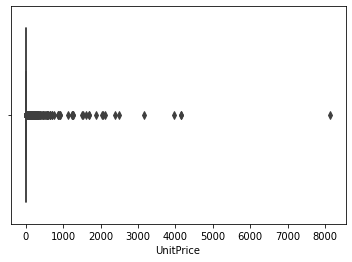

In [13]:
#check the outliers
sns.boxplot(x=df["UnitPrice"])

C:\Users\Alifia\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Alifia\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


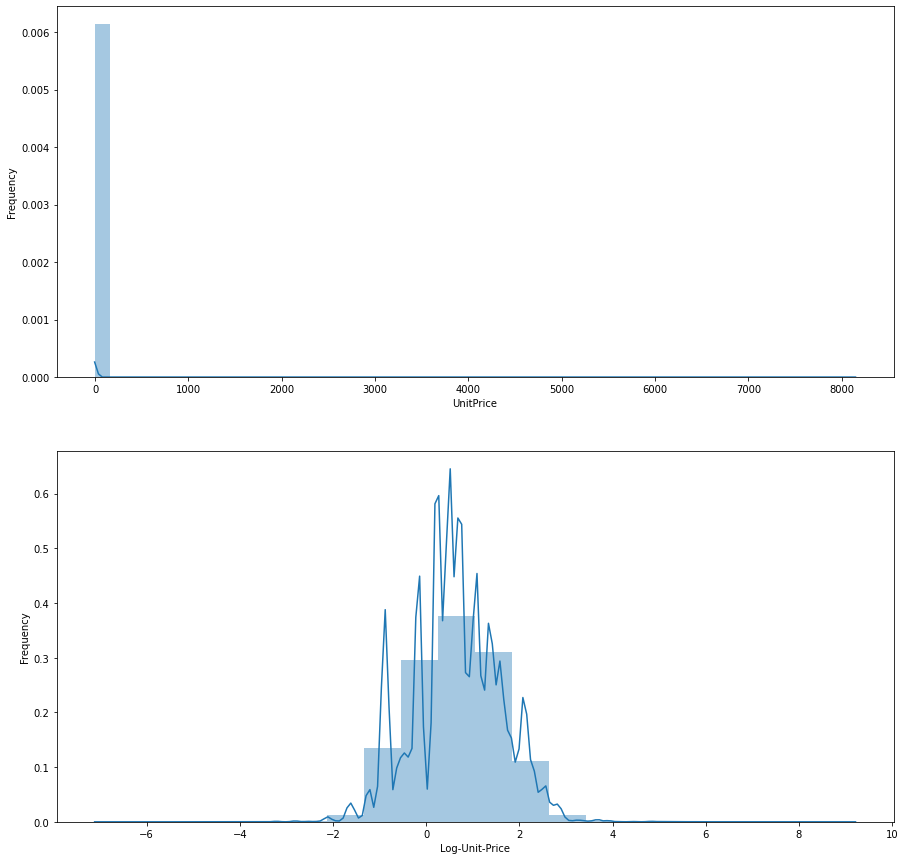

In [14]:
#see the distribution
fig, ax = plt.subplots(2,1,figsize=(15,15))
sns.distplot(df.UnitPrice, ax=ax[0])
ax[0].set_ylabel('Frequency')
sns.distplot(np.log(df.UnitPrice), ax=ax[1], bins=20)
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel("Log-Unit-Price");

In [15]:
#Take the exponent of -2 and 3 as it is the range of the distribution
#in log-Unit-Price
np.exp(-2),np.exp(3)

(0.1353352832366127, 20.085536923187668)

In [16]:
#Only take the price value from range of 0.1 to 20
df = df.loc[(df.UnitPrice > 0.1) & (df.UnitPrice < 20)]

C:\Users\Alifia\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Alifia\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


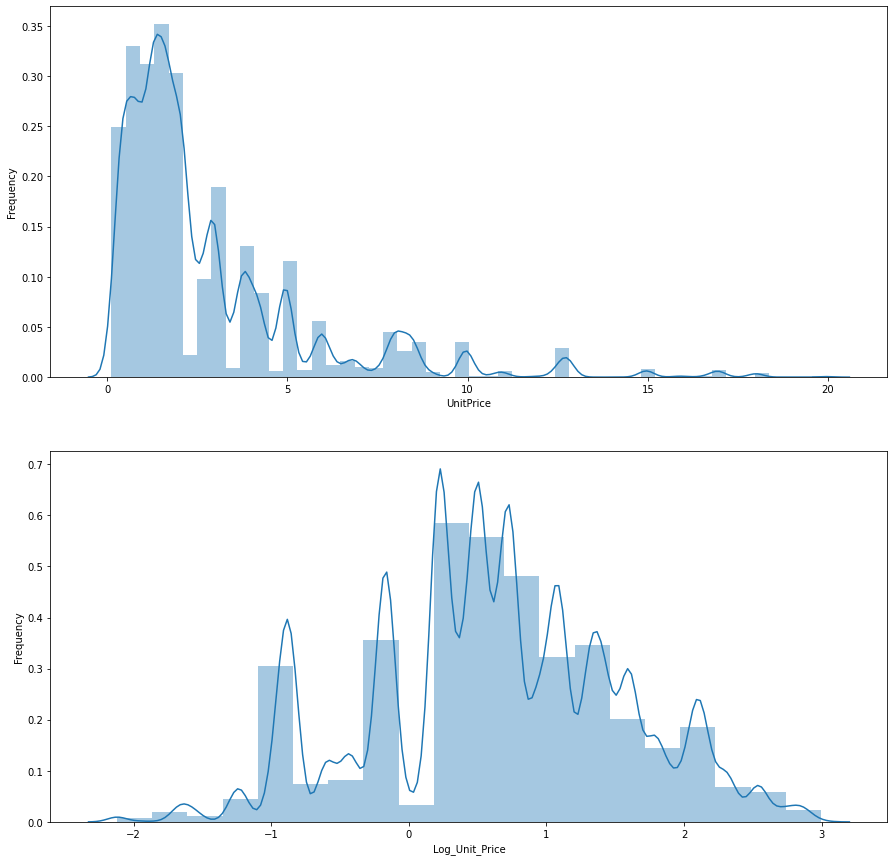

In [17]:
#see the distribution
fig, ax = plt.subplots(2,1,figsize=(15,15))
sns.distplot(df.UnitPrice, ax=ax[0])
ax[0].set_ylabel('Frequency')
sns.distplot(np.log(df.UnitPrice), ax=ax[1], bins=20)
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel("Log_Unit_Price");

In [18]:
#Descriptive statistics
df.UnitPrice.describe()

count    396462.000000
mean          2.809563
std           2.783123
min           0.120000
25%           1.250000
50%           1.950000
75%           3.750000
max          19.960000
Name: UnitPrice, dtype: float64

### Quantity values analysis

In [19]:
#Descriptive statistics
df.Quantity.describe()

count    396462.000000
mean         12.933943
std         179.461050
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

C:\Users\Alifia\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


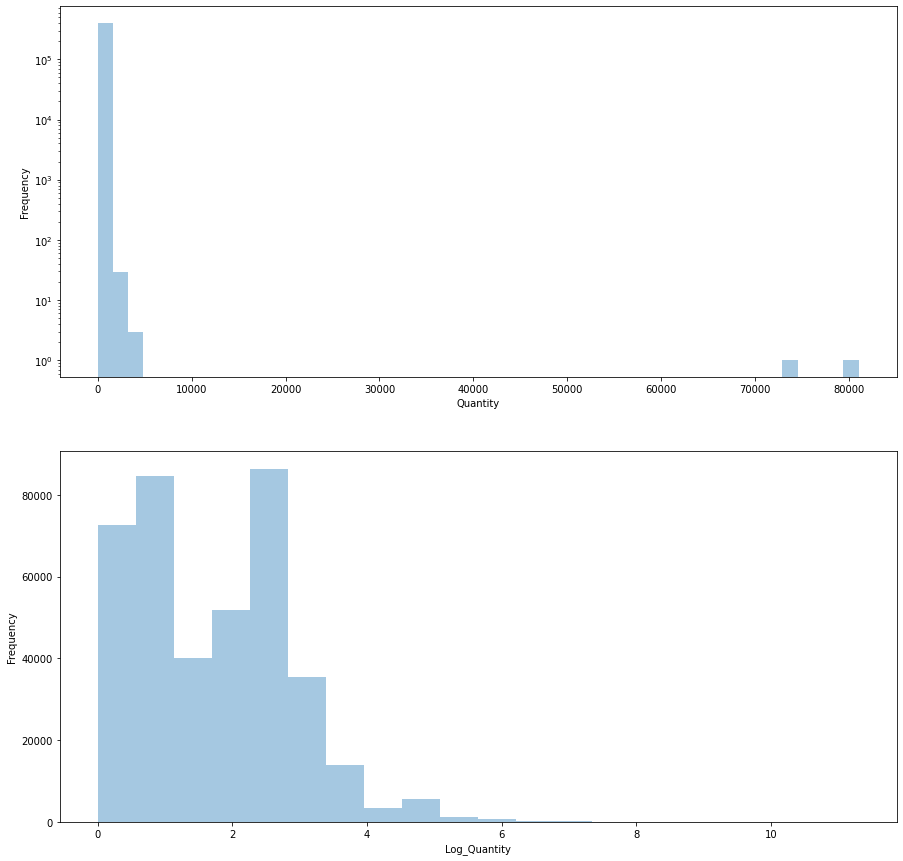

In [20]:
#see the distribution
fig, ax = plt.subplots(2,1,figsize=(15,15))
sns.distplot(df.Quantity, ax=ax[0], kde=False)
ax[0].set_ylabel('Frequency')
ax[0].set_yscale("log")
sns.distplot(np.log(df.Quantity), ax=ax[1], bins=20, kde=False)
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel("Log_Quantity");

In [21]:
#Take the exponent of 4 with quantile of 0.95
np.exp(4),np.quantile(df.Quantity, 0.95)

(54.598150033144236, 36.0)

In [22]:
#Take 95% of the data with maximum quantity at 55
df = df.loc[df.Quantity < 55]

C:\Users\Alifia\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


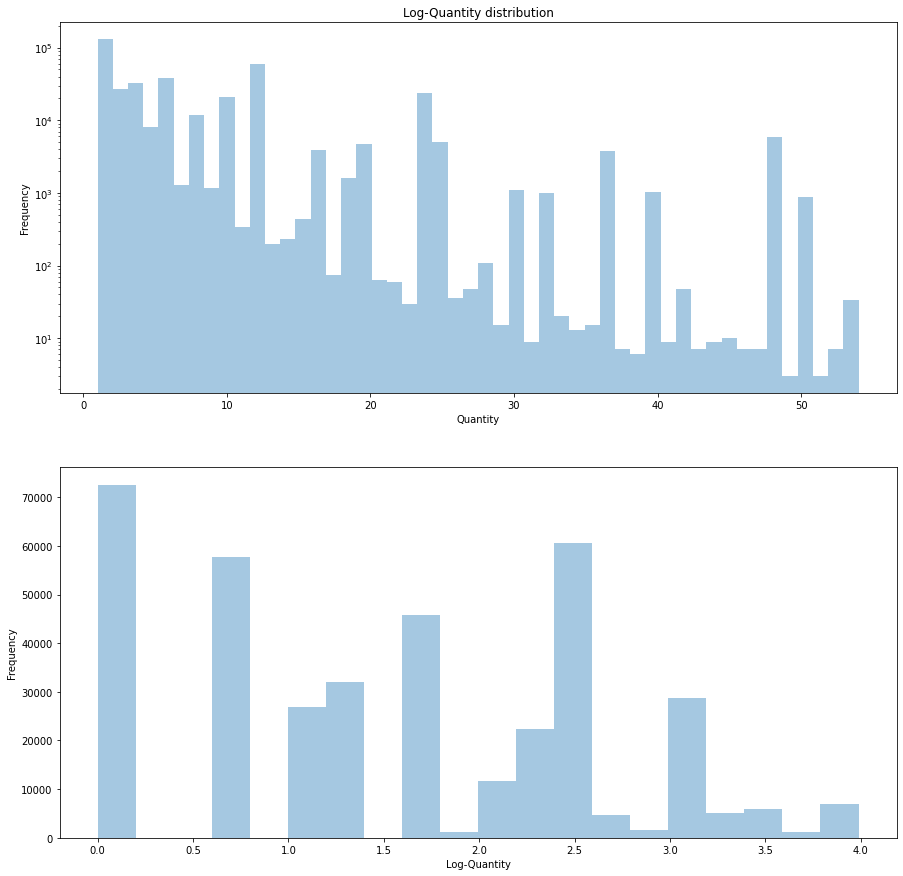

In [23]:
#See the distribution
fig, ax = plt.subplots(2,1,figsize=(15,15))
sns.distplot(df.Quantity, ax=ax[0], kde=False)
ax[0].set_title("Quantity distribution")
ax[0].set_ylabel('Frequency')
ax[0].set_yscale("log")
sns.distplot(np.log(df.Quantity), ax=ax[1], bins=20, kde=False)
ax[0].set_title("Log-Quantity distribution")
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel("Log-Quantity");

In [24]:
#Descriptive statistics
df.Quantity.describe()

count    385086.000000
mean          8.303200
std           9.298515
min           1.000000
25%           2.000000
50%           5.000000
75%          12.000000
max          54.000000
Name: Quantity, dtype: float64

### New coloumn for Revenue

In [25]:
df["Revenue"] = df.UnitPrice *df.Quantity

In [26]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Date,Time,UnitPrice,CustomerID,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2020-12-01 08:26:00,12/1/2020,8:26,2.55,17850,15.30
1,536365,71053,WHITE METAL LANTERN,6,2020-12-01 08:26:00,12/1/2020,8:26,3.39,17850,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2020-12-01 08:26:00,12/1/2020,8:26,2.75,17850,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2020-12-01 08:26:00,12/1/2020,8:26,3.39,17850,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2020-12-01 08:26:00,12/1/2020,8:26,3.39,17850,20.34


### Delete Data and Time coloumns

In [28]:
df.drop(columns=['Date','Time'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2020-12-01 08:26:00,2.55,17850,15.30
1,536365,71053,WHITE METAL LANTERN,6,2020-12-01 08:26:00,3.39,17850,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2020-12-01 08:26:00,2.75,17850,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2020-12-01 08:26:00,3.39,17850,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2020-12-01 08:26:00,3.39,17850,20.34
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2021-12-09 12:50:00,0.85,12680,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2021-12-09 12:50:00,2.10,12680,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2021-12-09 12:50:00,4.15,12680,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2021-12-09 12:50:00,4.15,12680,16.60


### Save the new dataset

In [29]:
df.to_csv(r'C:/Users/Alifia/Downloads/E-COmmerce/Cleaned_data.csv', index = False)